# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

1平方英尺是一个边长为0.3048米长的正方形面积。

## 读取数据

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_price = pd.read_csv("house_price.csv",encoding="utf-8")

In [3]:
house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 评估及清洗数据

结构上看，数据表数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。  

下面进行数据干净度评估及清洗： 

In [4]:
#首先，为了区分开经过清理的数据和原始的数据，新建一份清洗的数据表
clean_house_price = house_price.copy() 

In [5]:
clean_house_price.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


通过info函数，对数据表大致了解。另外，有7个变量都是分类数据，把数据类型都转换为Category，节省存储空间。

In [6]:
#修改数据类型
clean_house_price["mainroad"] = clean_house_price["mainroad"].astype("category")
clean_house_price["guestroom"] = clean_house_price["guestroom"].astype("category")
clean_house_price["basement"] = clean_house_price["basement"].astype("category")
clean_house_price["hotwaterheating"] = clean_house_price["hotwaterheating"].astype("category")
clean_house_price["airconditioning"] = clean_house_price["airconditioning"].astype("category")
clean_house_price["prefarea"] = clean_house_price["prefarea"].astype("category")
clean_house_price["furnishingstatus"] = clean_house_price["furnishingstatus"].astype("category")

###  处理缺失数据

In [7]:
clean_house_price.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


从info方法的输出结果来看，clean_house_price数据暂无缺失值。

###  处理重复值数据

根据数据变量的含义和内容来看，允许数据值存在重复的情况，因此不需要处理重复数据。

###  处理不一致数据

In [8]:
#查看分类数据是否存在不一致的值
clean_house_price["mainroad"].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [9]:
clean_house_price["guestroom"].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [10]:
clean_house_price["basement"].value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [11]:
clean_house_price["hotwaterheating"].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [12]:
clean_house_price["prefarea"].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [13]:
clean_house_price["furnishingstatus"].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

从以上结果看出，分类数据不存在数据不一致的情况。

###  处理无效数据

可以通过DataFrame的describe方法，对数值统计信息进行快速了解。

In [14]:
clean_house_price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


从以上统计数据看，数据表不存在脱离现实意义的值

## 探索数据

通过数据可视化，探索数值变量的分布，以及与房价存在相关性的变量，为后续的进一步分析提供方向。

### 房价分布

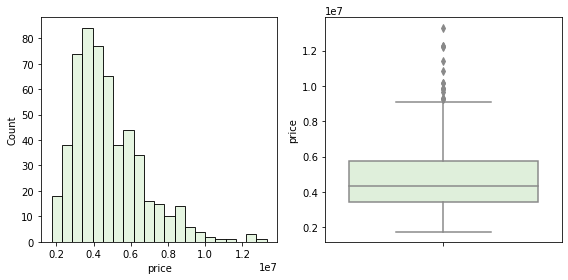

In [15]:
sns.set_palette("GnBu") # 设置图表色盘
plt.rcParams["figure.figsize"] = [8.0,4.0] #设置图形默认大小
plt.rcParams["figure.autolayout"] = True  #启用自动布局功能

figure,axes = plt.subplots(1,2)
sns.histplot(data=clean_house_price,x='price',ax=axes[0]) 
sns.boxplot(data=clean_house_price,y='price',ax=axes[1]) 
plt.show()

房价呈右偏分布，大多数房子价格中等，但有一些价格很高的极端值，使得均值被拉高。

### 面积分布

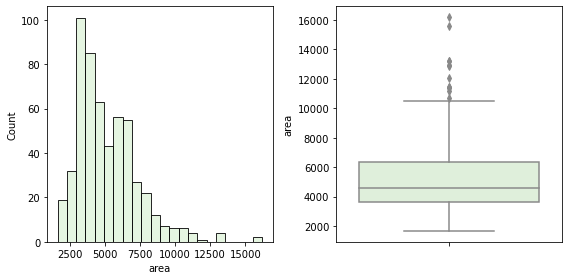

In [16]:
figure,axes = plt.subplots(1,2)
sns.histplot(data=clean_house_price,x='area',ax=axes[0]) 
sns.boxplot(data=clean_house_price,y='area',ax=axes[1]) 
plt.show()

面积的分布与房价相似，也呈右偏态分布。

### 房价与面积的关系

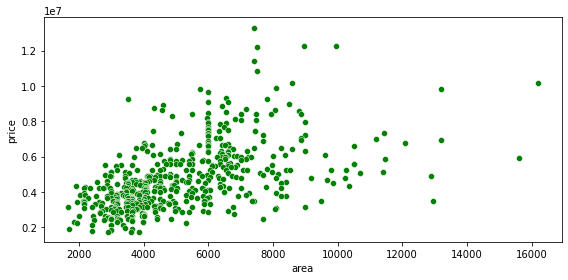

In [17]:
sns.scatterplot(data = clean_house_price,x='area',y='price',color = "green")
plt.show()

从散点图来看，能大致看出一些正相关关系，但关系的强度需要后续通过计算相关性来得到。

### 卧室数与房价

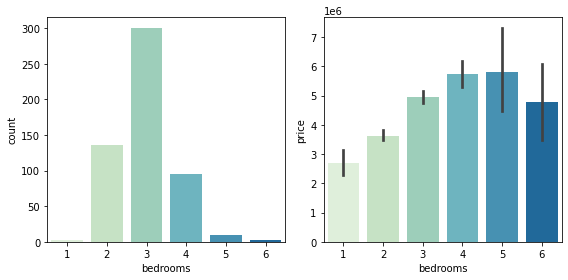

In [18]:
figure,axes = plt.subplots(1,2)
sns.countplot(data=clean_house_price,x='bedrooms',ax=axes[0])
sns.barplot(data=clean_house_price,x='bedrooms',y='price',ax=axes[1])#默认聚合方式是均值
plt.show()

由卧室数量柱状图看出，此数据集中房子的卧室数范围为1-6个，其中大多数房子有2-4个卧室。  
从平均房价与卧室数之间的柱状图来看，当卧室数小于5个时，卧室数多的房子价格也相应高，但一旦多于5个，房价并不一定相应更高。

### 洗手间数与房价的关系

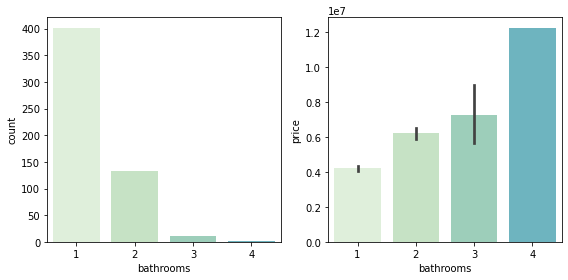

In [19]:
figure,axes = plt.subplots(1,2)
sns.countplot(data=clean_house_price,x='bathrooms',ax=axes[0])
sns.barplot(data=clean_house_price,x='bathrooms',y='price',ax=axes[1])#默认聚合方式是均值
plt.show()

由洗手间数量柱状图看出，此数据集中房子的洗手间数量范围为1-4个，其中绝大多数房子仅有一个洗手间。  
而从平均房价与洗手间数之间的柱状图来看，洗手间数量越多，房价越高。

### 楼层数与房价的关系

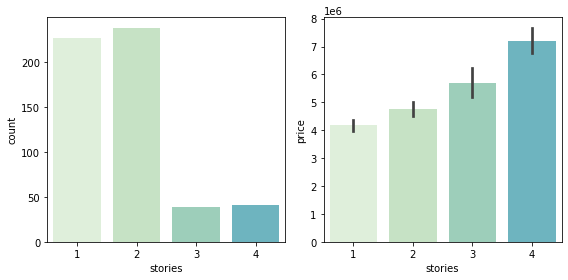

In [20]:
figure,axes = plt.subplots(1,2)
sns.countplot(data=clean_house_price,x='stories',ax=axes[0])
sns.barplot(data=clean_house_price,x='stories',y='price',ax=axes[1])#默认聚合方式是均值
plt.show()

由楼层数量柱状图看出，此数据集中房子的楼层范围为1-4层，其中绝大多数房子仅有1-2层。  
从平均房价与楼层数之间的柱状图来看，楼层多的房子价格也相应高。

### 车库数与房价的关系

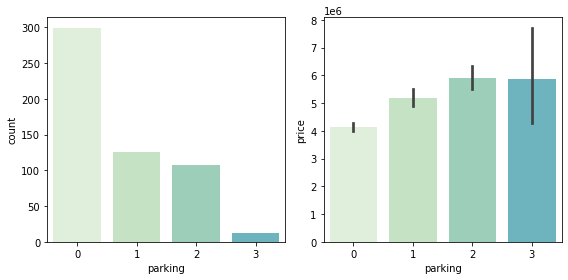

In [21]:
figure,axes = plt.subplots(1,2)
sns.countplot(data=clean_house_price,x='parking',ax=axes[0])
sns.barplot(data=clean_house_price,x='parking',y='price',ax=axes[1])#默认聚合方式是均值
plt.show()

由车库数量柱状图看出，此数据集中房子的车库数范围为0-3个，不带车库的房子数量是最多的，其次是1个和2个。  
从平均房价与车库数之间的柱状图来看，车库多的房子价格也相应高，但超过2个后，房价并不一定相应更高。

### 是否在主路与房价

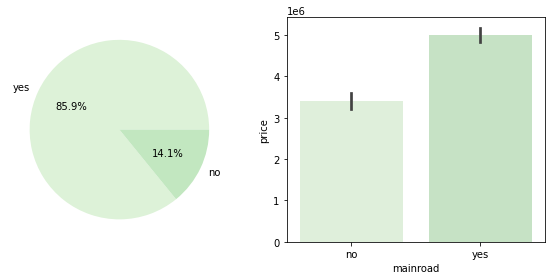

In [22]:
figure,axes = plt.subplots(1,2)
mainroad_count = clean_house_price["mainroad"].value_counts()
axes[0].pie(mainroad_count,labels=mainroad_count.index,autopct="%.1f%%")
sns.barplot(data=clean_house_price,x='mainroad',y='price',ax=axes[1])#默认聚合方式是均值
plt.show()

此数据集中大多数房子位于主路，占比85.9%，位于主路的房价均值更高。

### 是否有客房与房价

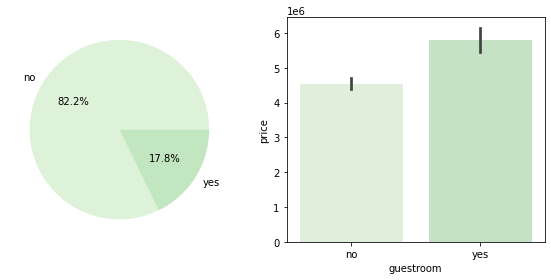

In [23]:
figure,axes = plt.subplots(1,2)
mainroad_count = clean_house_price["guestroom"].value_counts()
axes[0].pie(mainroad_count,labels=mainroad_count.index,autopct="%.1f%%")
sns.barplot(data=clean_house_price,x='guestroom',y='price',ax=axes[1])#默认聚合方式是均值
plt.show()

此数据集中大多数房子都有客房，占比82.2%，配有客房的房价均值更高。

### 是否有地下室与房价

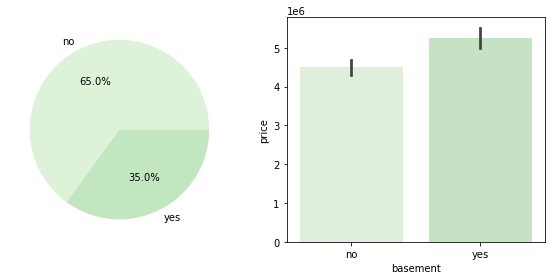

In [24]:
figure,axes = plt.subplots(1,2)
mainroad_count = clean_house_price["basement"].value_counts()
axes[0].pie(mainroad_count,labels=mainroad_count.index,autopct="%.1f%%")
sns.barplot(data=clean_house_price,x='basement',y='price',ax=axes[1])#默认聚合方式是均值
plt.show()

此数据集中多数房子没有地下室，占比65%，有地下室的房价均值更高。

### 是否有热水器与房价

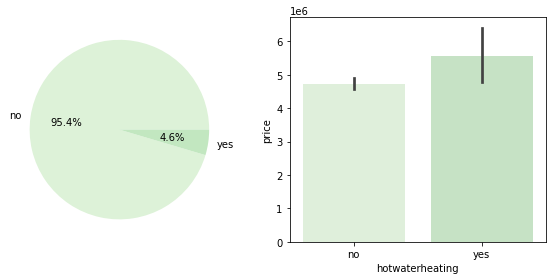

In [25]:
figure,axes = plt.subplots(1,2)
mainroad_count = clean_house_price["hotwaterheating"].value_counts()
axes[0].pie(mainroad_count,labels=mainroad_count.index,autopct="%.1f%%")
sns.barplot(data=clean_house_price,x='hotwaterheating',y='price',ax=axes[1])#默认聚合方式是均值
plt.show()

此数据集中大多数房子没有配热水器，占比95.4%，但配有热水器的房价均值更高。

### 是否有空调与房价

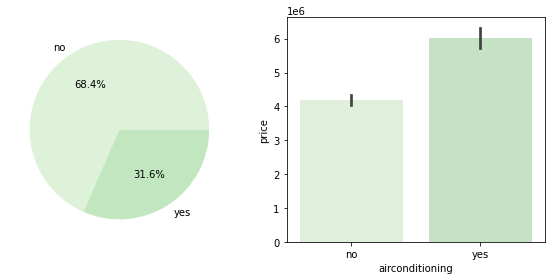

In [26]:
figure,axes = plt.subplots(1,2)
mainroad_count = clean_house_price["airconditioning"].value_counts()
axes[0].pie(mainroad_count,labels=mainroad_count.index,autopct="%.1f%%")
sns.barplot(data=clean_house_price,x='airconditioning',y='price',ax=axes[1])#默认聚合方式是均值
plt.show()

此数据集中多数房子没有空调，占比68.4%，配有空调的房价均值更高。

### 是否位于城市首选社区与房价

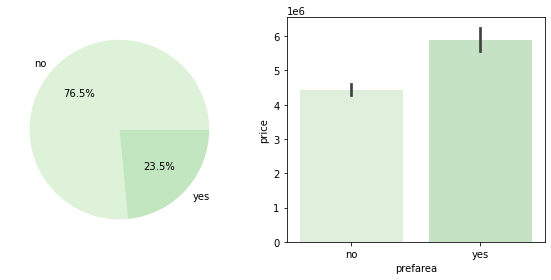

In [27]:
figure,axes = plt.subplots(1,2)
mainroad_count = clean_house_price["prefarea"].value_counts()
axes[0].pie(mainroad_count,labels=mainroad_count.index,autopct="%.1f%%")
sns.barplot(data=clean_house_price,x='prefarea',y='price',ax=axes[1])#默认聚合方式是均值
plt.show()

此数据集中大多数房子位于城市首选社区，占比76.5%，位于城市首选社区的房价均值更高。

### 装修状态与房价

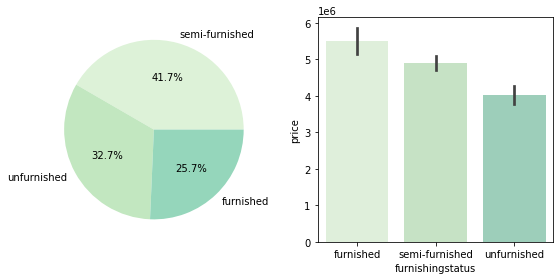

In [28]:
figure,axes = plt.subplots(1,2)
mainroad_count = clean_house_price["furnishingstatus"].value_counts()
axes[0].pie(mainroad_count,labels=mainroad_count.index,autopct="%.1f%%")
sns.barplot(data=clean_house_price,x='furnishingstatus',y='price',ax=axes[1])#默认聚合方式是均值
plt.show()

此数据集中简装和毛坯的房子较多，1/4左右房子为精装。精装的房子价格高于简装，简装高于毛坯。

## 数据分析

### 线性回归分析

目标：运用线性回归分析，来得到一个可以根据房屋各个属性对价格进行预测的数学模型。

In [29]:
import statsmodels.api as sm #引入线性回归分析的模块

和`clean_house_price`区分开，创建一个新的DataFrame`lr_house_price`，让它作为进行线性回归分析所用的数据。  
因为在进行回归分析前，还可能需要对数据进行一些准备，比如引入虚拟变量等。

In [30]:
lr_house_price = clean_house_price.copy()

由于数据里存在分类变量，无法直接建立线性回归模型。这里需要引入虚拟变量，也就是用0和1分别表示是否属于该分类。

In [31]:
lr_house_price = pd.get_dummies(lr_house_price, drop_first=True, columns=['mainroad', 'guestroom','basement', 'hotwaterheating',
                                                         'airconditioning','prefarea','furnishingstatus'], dtype=int)
#drop_first=True，默认删除第一个虚拟变量，否则会出现共线性问题
lr_house_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


接下来把因变量和自变量划分开。

In [32]:
y = lr_house_price["price"]

In [33]:
X = lr_house_price.drop("price",axis=1)

In [34]:
X.corr()#两两配对后的相关系数，一次性计算得出。当相关关系绝对值大于0.8时，我们认为两个变量之间存在强相关关系

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194
airconditioning_yes,0.222393,0.160603,0.186915,0.293602,0.159173,0.105423,0.138179,0.047341,-0.130023,1.000000,0.117382,-0.053179,-0.094086


In [35]:
X.corr().abs() > 0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


一般我们认为，当相关系数的绝对值大于0.8的时候，可能导致严重共线性。从结果看来，没有存在强相关的变量，不需要从X里面移除变量

In [36]:
X = sm.add_constant(X)  #给模型的线性方程添加截距

In [37]:
X

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


下一步就可以调用OLS函数，利用最小二乘法来得到线性回归模型的参数值。

In [38]:
model = sm.OLS(y,X).fit()

In [39]:
model.summary()#查看模型结果,使用summary方法来获得总结信息

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Sat, 12 Jul 2025   Prob (F-statistic):          9.07e-123
Time:                        14:30:46   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

当我们把显著区间设定为0.05时，以上结果的P值可以看出，模型认为以下因素对房屋价格没有显著性影响：卧室数、是否为简装房。此外，常数（表示线性方程的截距）的P值也很大，说明也没有显著影响。

可以把这些变量移除后，再次建立线性回归模型。

In [40]:
X = X.drop(["const","bedrooms","furnishingstatus_semi-furnished"],axis=1)

In [41]:
model = sm.OLS(y,X).fit()

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Sat, 12 Jul 2025   Prob (F-statistic):                        0.00
Time:                        14:30:46   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

可以看到，当我们把P值较大的自变量从线性回归模型中移除后，R方的值从0.682增长到了0.957，提高了模型对现有数据的拟合度。

根据各个自变量在线性回归方程中的系数来看，模型预测以下因素的增加（或存在）会显著增加房屋价格：房屋面积、厕所数、楼层数、车库容量、位于主路、有客房、有地下室、有热水器、有空调、位于城市首选社区。

线性回归模型预测以下因素的增加（或存在）会显著降低房屋价格：房屋未经装修，为毛坯房。

### 预测房价

In [43]:
# 要预测房价的房屋的信息：
# 面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修

In [44]:
price_to_predict = pd.DataFrame({"area":[6500], "bedrooms":[4],  'bathrooms': [2], 
                                 'stories': [2], 'mainroad': ['no'], 'guestroom': ['no'],
                                 'basement': ['yes'], 'hotwaterheating': ['yes'],
                                 'airconditioning': ['no'], 'parking': 2, 'prefarea': ['yes'],
                                 'furnishingstatus': ['semi-furnished']})
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,6500,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


需要把分类变量的类型转换为Category，并且通过`categories`参数，让程序知道所有可能的分类值。  
这样做的原因是，预测数据包含的分类可能不全。我们需要确保引入虚拟变量的时候，不会漏掉某个或某些分类。

In [45]:
price_to_predict['mainroad'] = pd.Categorical(price_to_predict['mainroad'], categories=['no', 'yes'])
price_to_predict['guestroom'] = pd.Categorical(price_to_predict['guestroom'], categories=['no', 'yes'])
price_to_predict['basement'] = pd.Categorical(price_to_predict['basement'], categories=['no', 'yes'])
price_to_predict['hotwaterheating'] = pd.Categorical(price_to_predict['hotwaterheating'], categories=['no', 'yes'])
price_to_predict['airconditioning'] = pd.Categorical(price_to_predict['airconditioning'], categories=['no', 'yes'])
price_to_predict['prefarea'] = pd.Categorical(price_to_predict['prefarea'], categories=['no', 'yes'])
price_to_predict['furnishingstatus'] = pd.Categorical(price_to_predict['furnishingstatus'], categories=['furnished', 'semi-furnished', 'unfurnished'])

In [46]:
#引入虚拟变量
price_to_predict = pd.get_dummies(price_to_predict, drop_first=True, 
                                  columns=['mainroad', 'guestroom',
                                           'basement', 'hotwaterheating',
                                           'airconditioning','prefarea', 
                                           'furnishingstatus'], dtype=int)
price_to_predict.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,6500,4,2,2,2,0,0,1,1,0,1,1,0


In [47]:
#把模型中没有用到的自变量删除。因为需要保证预测的数据的变量和预测模型中的自变量完全一致

In [48]:
price_to_predict = price_to_predict.drop(["bedrooms","furnishingstatus_semi-furnished"],axis=1)

接下来就可以调用线性回归模型的predict方法，获得预测价格。

In [49]:
predicted_value = model.predict(price_to_predict)

In [50]:
predicted_value

0    7.303754e+06
dtype: float64

线性回归模型预测的价格为：7303754